Using `ECOv002-CMR` package to retrieve ECOSTRESS granules as inputs using the Common Metadata Repository (CMR) API. Using `ECOv002-L3T-L4T-JET` package to run the product generating executable (PGE).

In [1]:
import numpy as np
from ECOv002_CMR import download_ECOSTRESS_granule
from ECOv003_L3T_L4T_JET import generate_L3T_L4T_JET_runconfig, L3T_L4T_JET

[2025-11-10 11:29:18 INFO] SRTM working directory: ~/data/NASADEM
[2025-11-10 11:29:18 INFO] SRTM download directory: ~/data/NASADEM
[2025-11-10 11:29:18 INFO] SRTM download directory: ~/data/NASADEM


Disable logger output in notebook

In [2]:
import logging

logging.getLogger().handlers = []

Set working directory

In [3]:
working_directory = "~/data/ECOSTRESS"
static_directory = "~/data/L3T_L4T_static"

Retrieve LST LSTE granule from CMR API for target date

In [4]:
L2T_LSTE_granule = download_ECOSTRESS_granule(
    product="L2T_LSTE", 
    orbit=35698,
    scene=14,
    tile="11SPS", 
    aquisition_date="2024-10-22",
    parent_directory=working_directory
)

L2T_LSTE_granule

L2TLSTE("/Users/halverso/data/ECOSTRESS/ECOv002_L2T_LSTE_35698_014_11SPS_20241022T183627_0713_01")

Load and display preview of surface temperature

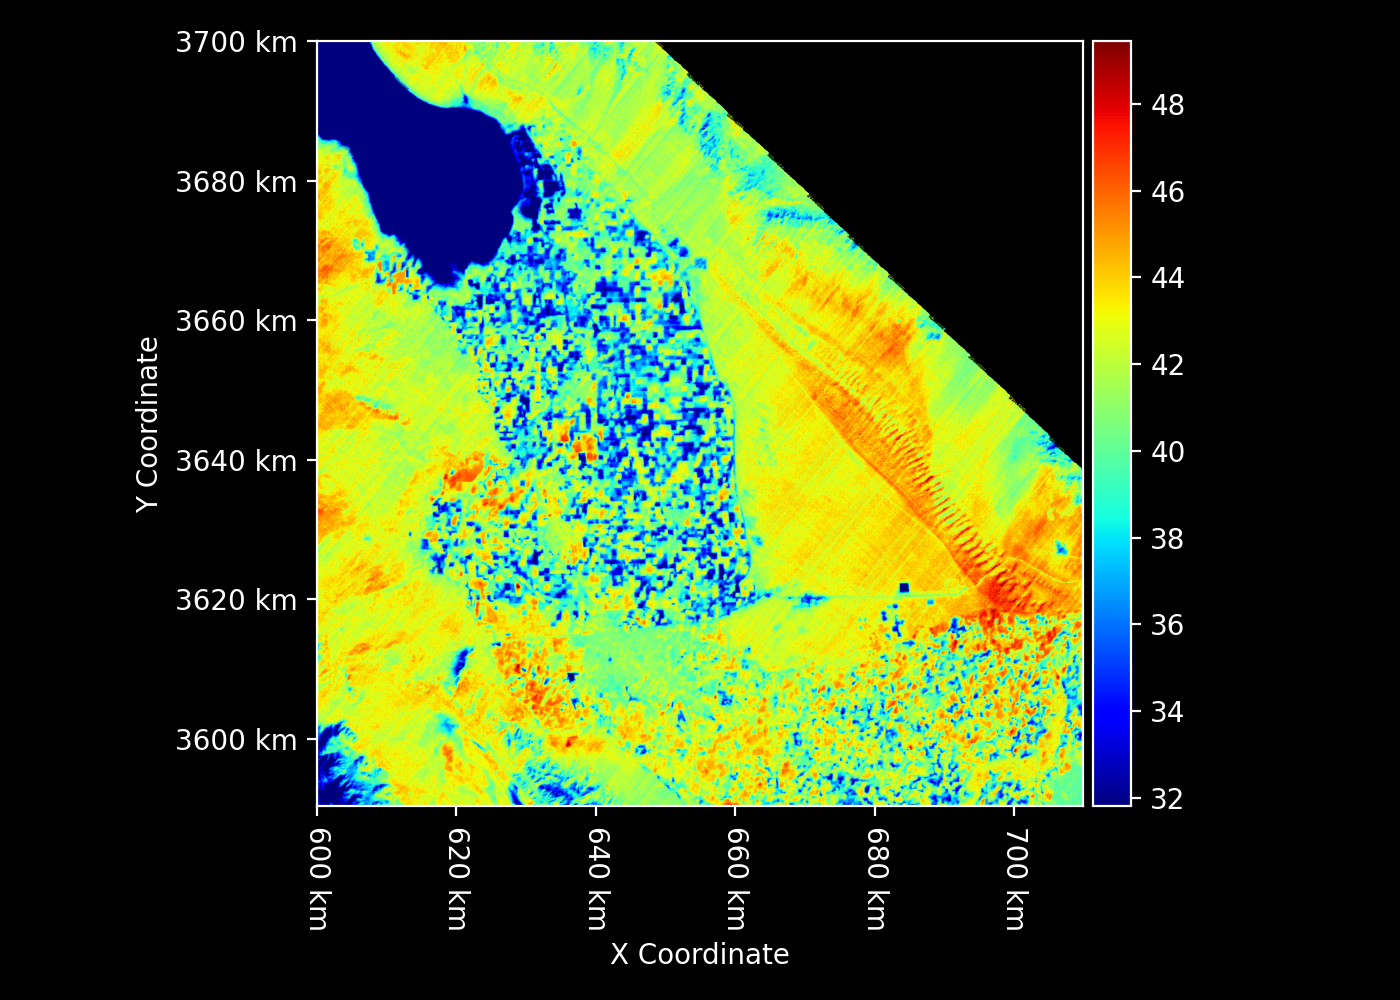

In [5]:
L2T_LSTE_granule.ST_C

Retrieve L2T STARS granule from CMR API as prior

In [6]:
L2T_STARS_granule = download_ECOSTRESS_granule(
    product="L2T_STARS", 
    tile="11SPS", 
    aquisition_date="2024-10-22",
    parent_directory=working_directory
)

L2T_STARS_granule

L2TSTARS("/Users/halverso/data/ECOSTRESS/ECOv002_L2T_STARS_11SPS_20241022_0713_01")

Load and display preview of vegetation index

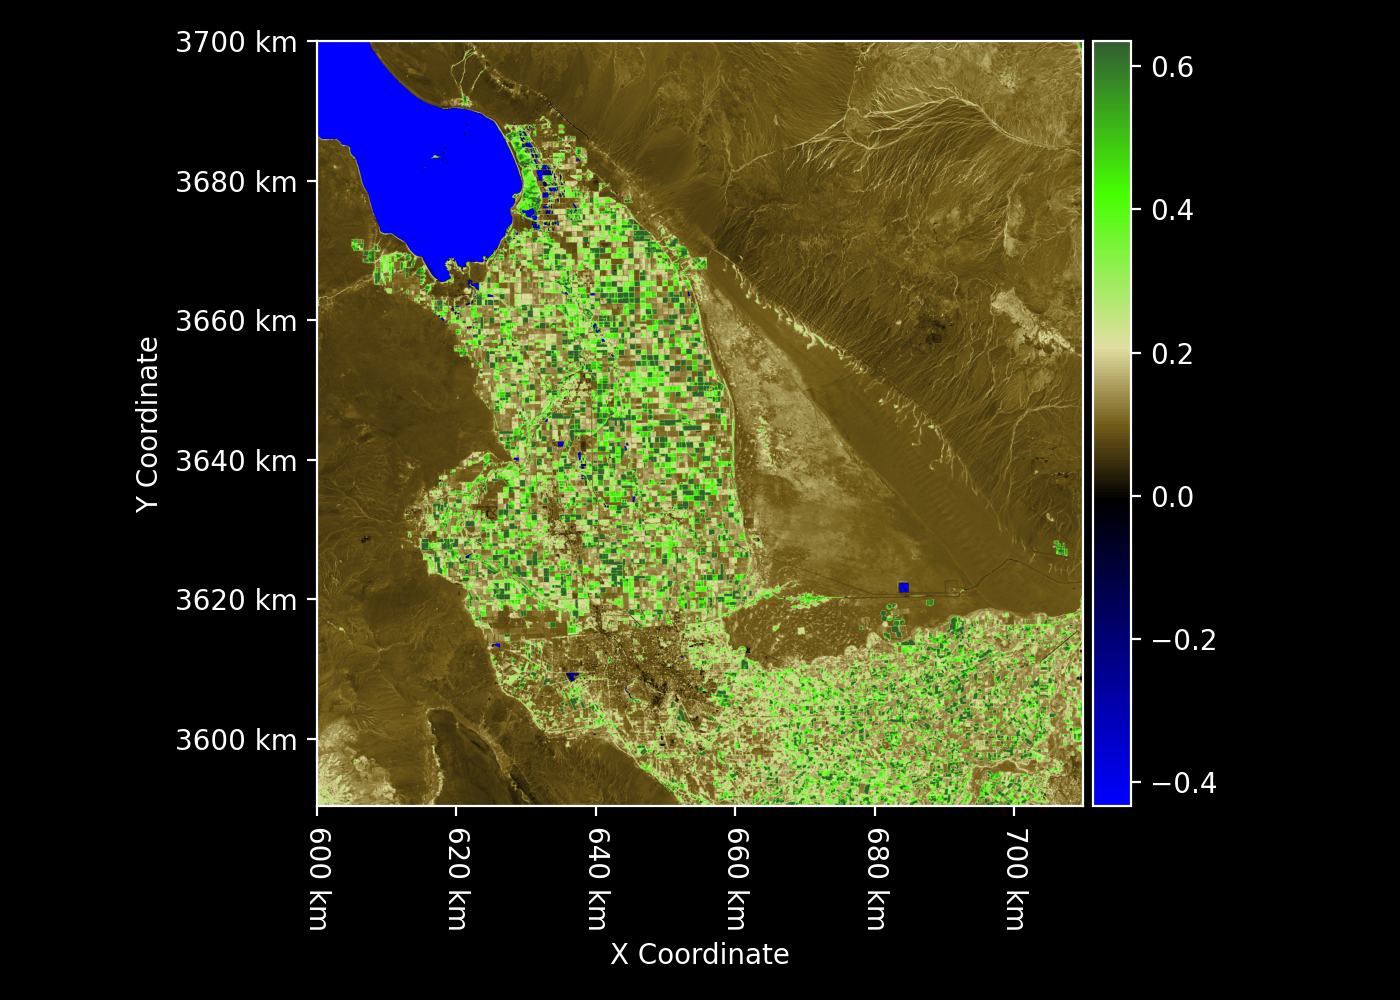

In [7]:
L2T_STARS_granule.NDVI

Generate XML run-config file for L3T L4T JET PGE run

In [8]:
runconfig_filename = generate_L3T_L4T_JET_runconfig(
    L2T_LSTE_filename=L2T_LSTE_granule.product_filename,
    L2T_STARS_filename=L2T_STARS_granule.product_filename,
    working_directory=working_directory,
    static_directory=static_directory
)

runconfig_filename

'/Users/halverso/data/ECOSTRESS/runconfig/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.xml'

In [9]:
with open(runconfig_filename, "r") as f:
    print(f.read())

<?xml version="1.0" encoding="UTF-8"?>
<input xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance"
       xmlns:xalan="http://xml.apache.org/xslt"
       xmlns:cas="http://oodt.jpl.nasa.gov/1.0/cas"
       xsi:noNamespaceSchemaLocation="">
    <group name="LogMetadata">
        <vector name="CommandLineParameters">
            <element>L3T_L4T_JET</element>
            <element>/Users/halverso/data/ECOSTRESS/runconfig/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.xml</element>
            <element>/Users/halverso/data/ECOSTRESS/log/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.log</element>
        </vector>
    </group>
    <group name="JobIdentification">
        <scalar name="ProductionLocation">ECOSTRESS Science Computing Facility</scalar>
        <scalar name="TaskId">urn:ecostress:L2GL2TLSTETask</scalar>
        <scalar name="ProcessingNode">MT-315735</scalar>
        <scalar name="ProductionDateTime">2025-11-10 19:29:24.749289</scalar>
        <scalar name="

In [10]:
exit_code = L3T_L4T_JET(runconfig_filename=runconfig_filename)
exit_code

[2025-11-10 11:29:24 INFO] started L3T L4T JET run at 2025-11-10 19:29:24.793146 UTC
[2025-11-10 11:29:24 INFO] L3T_L4T_JET PGE (1.10.0)
[2025-11-10 11:29:24 INFO] L3T_L4T_JET run-config: /Users/halverso/data/ECOSTRESS/runconfig/ECOv003_L3T_JET_35698_014_11SPS_20241022T183627_0700_01.xml
[2025-11-10 11:29:24 INFO] L3T JET granule ID: ECOv003_L3T_JET_35698_014_11SPS_07131110T000000_01
[2025-11-10 11:29:24 INFO] L3T JET granule directory: /Users/halverso/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_JET_35698_014_11SPS_07131110T000000_01
[2025-11-10 11:29:24 INFO] L3T JET zip file: /Users/halverso/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_JET_35698_014_11SPS_07131110T000000_01.zip
[2025-11-10 11:29:24 INFO] L3T JET preview: /Users/halverso/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_JET_35698_014_11SPS_07131110T000000_01.png
[2025-11-10 11:29:24 INFO] L3T ETAUX granule directory: /Users/halverso/data/ECOSTRESS/L3T_L4T_JET_output/ECOv003_L3T_ETAUX_35698_014_11SPS_07131110T000000_01


KeyError: 'Ra'